In [126]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import utils
import dataloaders
import torchvision
from trainer import Trainer
torch.random.manual_seed(0)
np.random.seed(0)


### Dataset

In [127]:
# Load the dataset and print some stats
batch_size = 64


image_transform_N = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5), (0.5))
])


In [128]:
def create_model():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28*1, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model = create_model()


In [129]:
# Test if the model is able to do a single forward pass
example_images = utils.to_cuda(example_images)
output = model(example_images)
print("Output shape:", output.shape)
expected_shape = (batch_size, 10) # 10 since mnist has 10 different classes
assert output.shape == expected_shape,    f"Expected shape: {expected_shape}, but got: {output.shape}"

Output shape: torch.Size([64, 10])


### Hyperparameters & Loss function

In [130]:
# Hyperparameters
learning_rate = .0192
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

### Train model

In [103]:
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict, test_loss_dict = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:05<00:00, 159.01it/s]


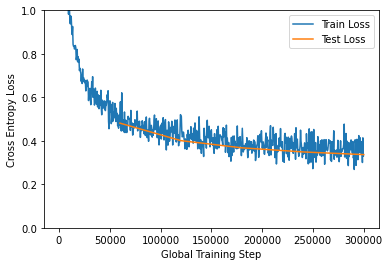

Final Test loss: 0.3365933334419302. Final Test accuracy: 0.9089


In [104]:
# We can now plot the training loss with our utility script

# Plot loss
utils.plot_loss(train_loss_dict, label="Train Loss")
utils.plot_loss(test_loss_dict, label="Test Loss")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")


## Plotting example

### Task A



In [105]:
# We reset the manual seed to 0, such that the model parameters are initialized with the same random number generator.
torch.random.manual_seed(0)
np.random.seed(0)

dataloader_train_N, dataloader_test_N = dataloaders.load_dataset(batch_size, image_transform_N)
example_images_N, _ = next(iter(dataloader_train_N))
print(f"The tensor containing the images has shape: {example_images_N.shape} (batch size, number of color channels, height, width)",
      f"The maximum value in the image is {example_images_N.max()}, minimum: {example_images_N.min()}", sep="\n\t")

model_N = create_model()
optimizer = torch.optim.SGD(model_N.parameters(),
                            lr=learning_rate)

trainer_N = Trainer(
  model=model_N,
  dataloader_train=dataloader_train_N,
  dataloader_test=dataloader_test_N,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_N, test_loss_dict_N = trainer_N.train(num_epochs)




Training epoch 0:   0%|          | 2/938 [00:00<00:47, 19.61it/s]

The tensor containing the images has shape: torch.Size([64, 1, 28, 28]) (batch size, number of color channels, height, width)
	The maximum value in the image is 1.0, minimum: 0.0


Training epoch 4: 100%|██████████| 938/938 [00:10<00:00, 86.30it/s]


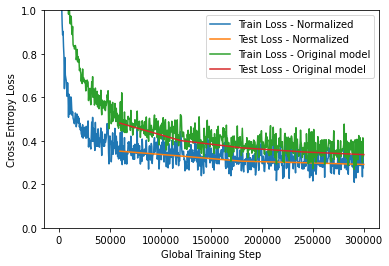

Final Test loss: 2.346682916021651. Final Test accuracy: 0.054
Final Test loss: 0.29142232052981853. Final Test accuracy: 0.9176


In [122]:
# now we can plot them against eachother

# Plot loss
utils.plot_loss(train_loss_dict_N, label="Train Loss - Normalized")
utils.plot_loss(test_loss_dict_N, label="Test Loss - Normalized")
utils.plot_loss(train_loss_dict, label="Train Loss - Original model")
utils.plot_loss(test_loss_dict, label="Test Loss - Original model")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

final_loss_N, final_acc_N = utils.compute_loss_and_accuracy(
    dataloader_test_N, model_N, loss_function)
print(f"Final Test loss: {final_loss_N}. Final Test accuracy: {final_acc_N}")



### Task B

torch.Size([10, 784])


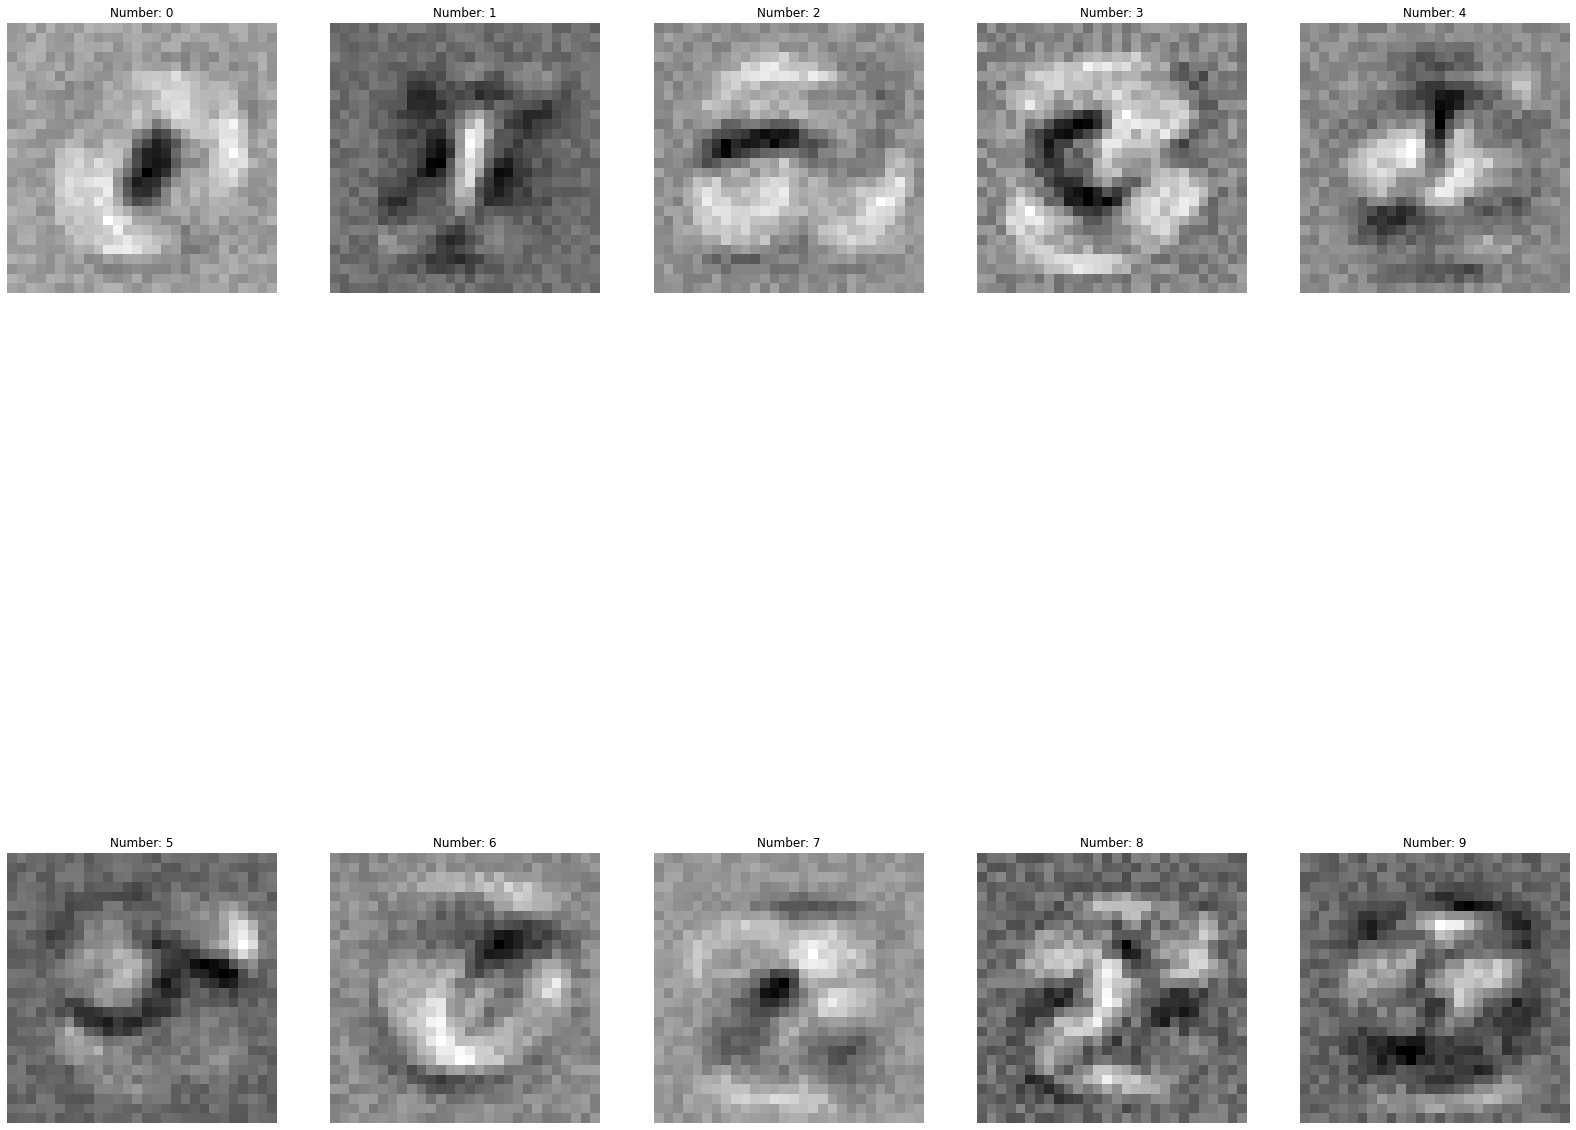

In [108]:
weight = list(model_N.children())[1].weight.cpu().data
print(weight.shape)
fig = plt.figure(figsize=(28, 28))

for i in range(weight.shape[0]):
    image = weight[i].reshape((28, 28))

    # Adds a subplot at the 1st position
    fig.add_subplot(2, 5, i + 1)  # rows, colums, position

    # showing image
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    plt.title(f"Number: {i}")

   




### Task C

In [116]:
# We reset the manual seed to 0, such that the model parameters are initialized with the same random number generator.
torch.random.manual_seed(0)
np.random.seed(0)

dataloader_train_N_1, dataloader_test_N_1 = dataloaders.load_dataset(batch_size, image_transform_N)
example_images_N_1, _ = next(iter(dataloader_train_N_1))
print(f"The tensor containing the images has shape: {example_images_N_1.shape} (batch size, number of color channels, height, width)",
      f"The maximum value in the image is {example_images_N_1.max()}, minimum: {example_images_N_1.min()}", sep="\n\t")

model_N_1 = create_model()
optimizer_N_1 = torch.optim.SGD(model_N_1.parameters(),
                            lr=1.0)

trainer_N_1 = Trainer(
  model=model_N_1,
  dataloader_train=dataloader_train_N_1,
  dataloader_test=dataloader_test_N_1,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer_N_1
)
train_loss_dict_N_1, test_loss_dict_N_1 = trainer_N_1.train(num_epochs)




 

Training epoch 0:   0%|          | 3/938 [00:00<00:34, 27.27it/s]

The tensor containing the images has shape: torch.Size([64, 1, 28, 28]) (batch size, number of color channels, height, width)
	The maximum value in the image is 1.0, minimum: -1.0


Training epoch 4: 100%|██████████| 938/938 [00:10<00:00, 89.25it/s]


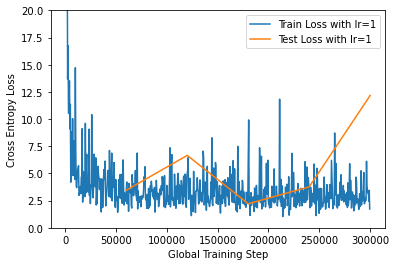

Final Test loss: 3.2361102747689388. Final Test accuracy: 0.7337
Average cross Entropi loss: 5.65342


In [121]:

# compute average loss
avg_loss = round(sum(test_loss_dict_N_1.values())/len(test_loss_dict_N_1.keys()),5)

# Plot loss
utils.plot_loss(train_loss_dict_N_1, label="Train Loss with lr=1")
utils.plot_loss(test_loss_dict_N_1, label="Test Loss with lr=1")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 20])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model_N_1.state_dict(), "saved_model.torch")
final_loss_N_1, final_acc_N_1 = utils.compute_loss_and_accuracy(
    dataloader_test, model_N_1, loss_function)
print(f"Final Test loss: {final_loss_N_1}. Final Test accuracy: {final_acc_N_1}")
print(f"Average cross Entropi loss: {avg_loss}")



### Task D

In [133]:
# We reset the manual seed to 0, such that the model parameters are initialized with the same random number generator.
torch.random.manual_seed(0)
np.random.seed(0)

learning_rate = .0192

def createReLU_model():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(),  # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28 * 28 * 1, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model

model_Relu = createReLU_model()
optimizer = torch.optim.SGD(model_Relu.parameters(),
                            lr=learning_rate)

trainer_Relu = Trainer(
  model=model_Relu,
  dataloader_train=dataloader_train_N,
  dataloader_test=dataloader_test_N,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)

train_loss_dict_Relu, test_loss_dict_Relu = trainer_Relu.train(num_epochs)








Training epoch 4: 100%|██████████| 938/938 [00:10<00:00, 87.15it/s]


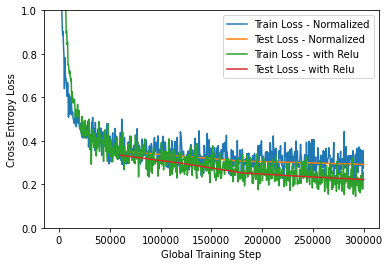

Final Test loss - Normalized: 0.29142232052981853. Final Test accuracy - Normalized: 0.9176
Final Test loss - Relu: 0.2220838809872319. Final Test accuracy - Relu: 0.9377


In [134]:
# Plot loss
utils.plot_loss(train_loss_dict_N, label="Train Loss - Normalized")
utils.plot_loss(test_loss_dict_N, label="Test Loss - Normalized")
utils.plot_loss(train_loss_dict_Relu, label="Train Loss - with Relu")
utils.plot_loss(test_loss_dict_Relu, label="Test Loss - with Relu")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4d.png")

plt.show()

print(f"Final Test loss - Normalized: {final_loss_N}. Final Test accuracy - Normalized: {final_acc_N}")

torch.save(model_Relu.state_dict(), "saved_model.torch")
final_loss_Relu, final_acc_Relu = utils.compute_loss_and_accuracy(
    dataloader_test_N, model_Relu, loss_function)

print(f"Final Test loss - Relu: {final_loss_Relu}. Final Test accuracy - Relu: {final_acc_Relu}")